In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.animation as animation
from scipy.stats import powerlaw
import model
import imageio


In [8]:
def log_log_logbin(degree_dist, num_bins = 20):
    """
    Function that plots the degree distrubtion on a log-log plot using logbinning
    """
    # Assert if degree_distirbution is not an array or if length of array is zero
    assert isinstance(degree_dist, np.ndarray) and len(degree_dist) > 0, "degree_dist must be a non-empty list" 
    
    log_bins = np.logspace(np.log10(min(degree_dist)), np.log10(max(degree_dist)), num = num_bins)
    hist, bin_edges = np.histogram(degree_dist, bins=log_bins)

    # Calculate bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plot the histogram in log-log scale
    plt.loglog(bin_centers, hist, 'bo', markersize=8)

    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Log-Log Plot with Log Binning for Degree Distribution')
    plt.grid(True)
    plt.show()

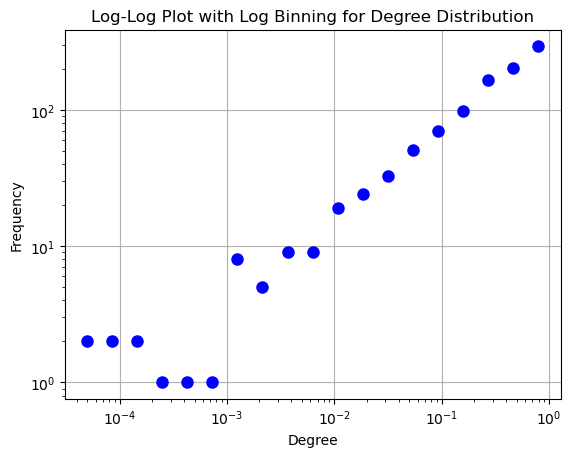

In [9]:
r = powerlaw.rvs(0.659, size=1000)
log_log_logbin(r)

In [2]:
def gif_creation(time_steps=200, m_zero = 5, fit_dist = 'exponential'):
    """
    Create a GIF animation of a network visualization over time.

    Parameters:
        time_steps (int): Number of time steps to generate and visualize the network (default: 200).
        m_zero (int): Initial value for m parameter in network generation (default: 5).

    Returns:
        None. Saves the resulting GIF animation as 'example.gif' in the current directory.
    """
    if type(time_steps) != int:
            raise TypeError('The parameter time_steps should be an integer instead of %s.'%type(time_steps))
    if type(m_zero) != int:
        raise TypeError('The parameter m_zero should be an integer instead of %s.'%type(m_zero))    
    
    # Initialize model
    network = model.network(m0= m_zero)
    
        # Set fit_dist 
    if fit_dist == 'exponential':
        network.set_fitness_distr('exponential') 
    elif fit_dist == 'uniform':
        network.set_fitness_distr('uniform')
    elif fit_dist == 'delta':
        network.set_fitness_distr('delta')
    elif fit_dist == 'ba':
        network.set_fitness_distr('ba')
    elif fit_dist == 'poisson':
        network.set_fitness_distr('poisson')
    
    # Per timestep: add node and save image of the network
    for i in range(time_steps):
        network.generate_network(m_zero+i+1)

        dict_t = network.graph

        G = nx.Graph()

        # Add nodes
        for node, (edges, fitness) in dict_t.items():
            G.add_node(node, fitness=fitness)

        # Add edges
        for node, (edges, fitness) in dict_t.items():
            for neighbor in edges:
                G.add_edge(node, neighbor)


        pos = nx.spring_layout(G)

        # Extract fitness values from the network dictionary
        fitness_values = [data['fitness'] for _, data in G.nodes(data=True)]

        # Calculate node degrees
        node_degrees = dict(G.degree())

        # Extract node sizes based on degrees
        node_sizes = [50 * node_degrees[node] for node in G.nodes()]

        plt.figure(figsize=(8, 6))
        nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=fitness_values, cmap='coolwarm', edge_color='gray', alpha=0.7)
        plt.title("Network Visualization")
        plt.savefig('Images_network_evol/image_'+ str(i) + '.png',  dpi=300)
    
    # Gif creation
    frames = []
    for i in range(time_steps):
        image = imageio.v2.imread(f'Images_network_evol/image_'+ str(i) + '.png')
        frames.append(image)
    
    # Save gif
    imageio.mimsave('./network_evol'+ fit_dist+ '.gif', # output gif
                frames,          # array of input frames
                fps = 5)         # optional: frames per second

# gif_creation(fit_dist = 'exponential')
# gif_creation(fit_dist = 'uniform')
# gif_creation(fit_dist = 'delta')
gif_creation(fit_dist = 'ba')
gif_creation(fit_dist = 'poisson')